# PyCaret: Anatomy of Regression

In [1]:
import pandas as pd

In [2]:
#! pip install pycaret

In [3]:
from pycaret.datasets import get_data

In [5]:
df = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
from pycaret.regression import *

In [10]:
reg = setup(df, target='charges')

,Description,Value
0,session_id,4699
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [11]:
check_model = compare_models(exclude=["catboost"], fold=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2659.3093,23316958.6117,4819.9217,0.8292,0.4441,0.3182,0.0500
lightgbm,Light Gradient Boosting Machine,3006.3574,25799685.5908,5077.3097,0.8104,0.5619,0.3923,0.1475
rf,Random Forest Regressor,2908.1199,27003427.7294,5185.5569,0.8023,0.4901,0.3591,0.2325
ada,AdaBoost Regressor,4082.5014,28477109.4304,5333.4597,0.7891,0.6041,0.6766,0.0250
et,Extra Trees Regressor,2965.8769,30834399.9711,5545.3171,0.7750,0.5018,0.3563,0.2275
xgboost,Extreme Gradient Boosting,3390.7560,33517405.0000,5784.6044,0.7539,0.6157,0.4522,0.7300
llar,Lasso Least Angle Regression,4167.2811,37940927.2105,6155.4207,0.7244,0.5428,0.4239,0.0175
ridge,Ridge Regression,4187.9017,38001149.0000,6160.2158,0.7241,0.5556,0.4270,0.0125
br,Bayesian Ridge,4184.8284,38008499.6378,6160.8662,0.7240,0.5550,0.4264,0.0100
lr,Linear Regression,4174.0693,38009438.0000,6161.0856,0.7239,0.5542,0.4244,1.3225


In [12]:
reg1 = setup(df, target='charges', train_size=0.8, session_id=117, log_experiment=True, transformation=True,
            pca=True, pca_method='linear', pca_components=0.8, experiment_name='ins1')

,Description,Value
0,session_id,117
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1070, 6)"


In [13]:
best_model = compare_models(exclude=['catboost'], fold=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5262.1147,56576786.1663,7513.5451,0.6098,0.6468,0.6444,0.1325
xgboost,Extreme Gradient Boosting,5137.9644,62875814.0000,7919.9454,0.5690,0.6323,0.5988,0.6775
et,Extra Trees Regressor,5817.5857,67870860.1885,8226.4685,0.5344,0.6530,0.7277,0.2125
gbr,Gradient Boosting Regressor,5917.9829,71582173.1272,8444.7340,0.5102,0.6614,0.7416,0.0925
rf,Random Forest Regressor,6529.4494,85245300.1468,9220.0484,0.4160,0.7138,0.8281,0.3225
llar,Lasso Least Angle Regression,8838.6661,128366096.8712,11324.8077,0.1173,0.8832,1.1640,0.0125
br,Bayesian Ridge,8860.8407,128410253.9329,11326.4892,0.1172,0.8784,1.1709,0.0125
lr,Linear Regression,8839.8599,128474380.0000,11329.6067,0.1166,0.8850,1.1600,1.7200
lasso,Lasso Regression,8839.7927,128466514.0000,11329.2568,0.1166,0.8859,1.1602,0.0125
ridge,Ridge Regression,8840.5642,128467112.0000,11329.2737,0.1166,0.8911,1.1604,0.0125


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [15]:
gbr = create_model('gbr', fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6405.7031,81442604.8548,9024.5557,0.4628,0.7109,0.8374
1,5480.6080,57848541.4965,7605.8229,0.5385,0.6846,0.8028
2,5681.1394,73908990.6922,8597.0338,0.5075,0.5982,0.5922
3,6104.4810,73128555.4654,8551.5236,0.5320,0.6520,0.7340
Mean,5917.9829,71582173.1272,8444.7340,0.5102,0.6614,0.7416
SD,360.5704,8568053.0160,518.3060,0.0297,0.0420,0.0940


In [16]:
lgbm = create_model('lightgbm', fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5079.7132,48825572.0493,6987.5298,0.6779,0.6318,0.6194
1,5504.0059,55148556.3121,7426.2074,0.5601,0.7457,0.7989
2,4932.4488,59552972.2715,7717.0572,0.6031,0.5717,0.5143
3,5532.2910,62780044.0324,7923.3859,0.5982,0.6378,0.6449
Mean,5262.1147,56576786.1663,7513.5451,0.6098,0.6468,0.6444
SD,261.4653,5231138.8026,351.3213,0.0427,0.0627,0.1018


In [17]:
tuned_gbr = tune_model(gbr, n_iter=10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4240.1235,39225802.1513,6263.0505,0.6671,0.5917,0.6570
1,5634.2997,69253438.1700,8321.8651,0.5638,0.7645,0.7759
2,6126.7388,77577993.4589,8807.8370,0.5289,0.8620,0.8304
3,5706.2352,66269136.5840,8140.5858,0.3813,0.7055,0.8681
4,5364.9198,59430365.2269,7709.1092,0.5779,0.7153,0.8159
5,5168.8957,57401862.1676,7576.4017,0.5081,0.6010,0.6050
6,5072.9120,62523607.7660,7907.1871,0.6256,0.4862,0.4356
7,5390.9259,60545306.3369,7781.0864,0.5778,0.6241,0.7476
8,5705.2252,68899129.8031,8300.5500,0.6108,0.6112,0.6028
9,5228.8190,55941157.7352,7479.3822,0.6476,0.5617,0.5691


In [18]:
tuned_gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.026, loss='ls',
                          max_depth=9, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.1, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=280,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=117, subsample=0.3, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
tuned_lgbm = tune_model(lgbm, n_iter=5, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3867.9334,26660199.0146,5163.3515,0.7737,0.6969,0.6426
1,5199.8952,56288137.9359,7502.5421,0.6455,0.7577,0.6452
2,5568.6511,58391311.7922,7641.4208,0.6454,0.6985,0.6880
3,5078.2058,52918185.8162,7274.4887,0.5059,0.7452,0.6397
4,4955.0455,47380349.4754,6883.3385,0.6635,0.7054,0.7229
5,4983.1809,51116975.7239,7149.6137,0.5620,0.6800,0.7049
6,4922.1272,65753160.9853,8108.8323,0.6062,0.5620,0.4616
7,4764.9671,48757232.1293,6982.6379,0.6600,0.5775,0.6406
8,6004.6512,69913151.3402,8361.4085,0.6051,1.0529,0.6967
9,5166.7636,54337651.2905,7371.4077,0.6577,0.5626,0.4894


In [20]:
tuned_lgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.22, max_depth=-1,
              min_child_samples=15, min_child_weight=0.001, min_split_gain=0.5,
              n_estimators=130, n_jobs=-1, num_leaves=10, objective=None,
              random_state=117, reg_alpha=0.15, reg_lambda=1e-07, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
stacked_gbr = stack_models(estimator_list=[gbr,lgbm], meta_model=tuned_lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3950.9101,31739038.3852,5633.7411,0.7306,0.6320,0.6299
1,4169.1964,47170684.1150,6868.0917,0.7029,0.6524,0.4774
2,5339.1780,59417495.0738,7708.2745,0.6392,0.7103,0.7052
3,4210.2226,36986498.9119,6081.6526,0.6547,0.5705,0.5139
4,4854.8147,57990792.6722,7615.1686,0.5881,0.6303,0.6262
5,4651.3756,47433515.4260,6887.1994,0.5936,0.5810,0.5540
6,4468.2977,56564051.8695,7520.9076,0.6613,0.5079,0.4071
7,4028.6847,37517028.3624,6125.1146,0.7384,0.7427,0.6329
8,5282.6003,63750993.8625,7984.4219,0.6399,0.6730,0.5378
9,4209.1481,39015438.1144,6246.2339,0.7542,0.5160,0.4725


In [23]:
en_lgbm = ensemble_model(estimator=lgbm, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4315.0456,31064235.3704,5573.5299,0.7363,0.6141,0.7079
1,5214.4001,52866599.9217,7270.9422,0.6670,0.6721,0.6431
2,5839.1185,64613097.3035,8038.2272,0.6077,0.6900,0.8131
3,5198.6289,47607431.9044,6899.8139,0.5555,0.6421,0.7266
4,5789.2975,59392155.4059,7706.6306,0.5782,0.7227,0.8827
5,4834.5879,48818440.1873,6987.0194,0.5817,0.5963,0.5855
6,5146.2366,57583208.5987,7588.3601,0.6551,0.5749,0.5349
7,5144.6346,47456761.4627,6888.8868,0.6691,0.6530,0.7619
8,5942.0084,65962323.8038,8121.7193,0.6274,0.6816,0.7378
9,5235.8731,51880914.7429,7202.8407,0.6732,0.5279,0.5634


In [24]:
blender = blend_models(estimator_list=[gbr,lgbm], fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5468.3328,58351457.0348,7638.8125,0.6151,0.6217,0.6793
1,5278.8874,52772776.4022,7264.4873,0.5790,0.6570,0.7484
2,5115.8569,63246528.8109,7952.7686,0.5785,0.5384,0.5115
3,5633.6022,63762628.1952,7985.1505,0.5919,0.6157,0.6641
Mean,5374.1698,59533347.6108,7710.3047,0.5911,0.6082,0.6508
SD,194.9206,4437812.4478,290.7719,0.0148,0.0433,0.0865


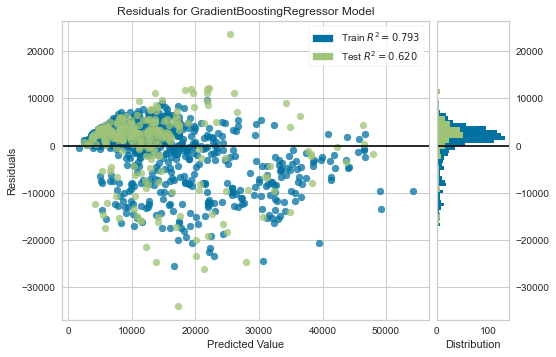

In [25]:
plot_model(gbr)

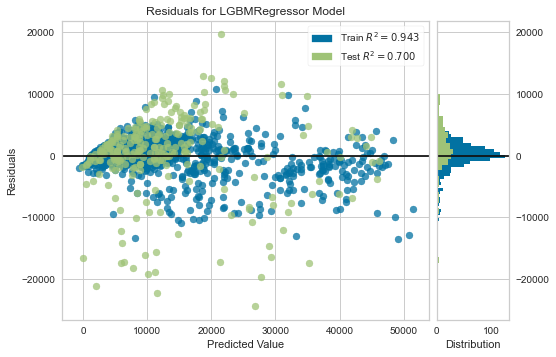

In [26]:
plot_model(lgbm)

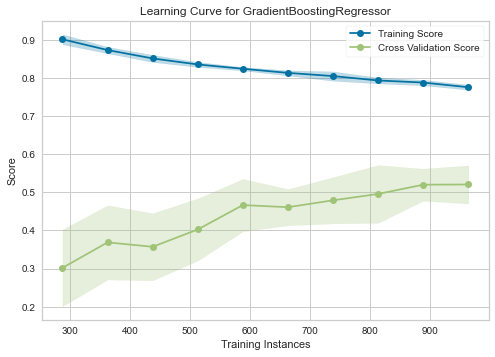

In [27]:
plot_model(gbr, plot='learning')

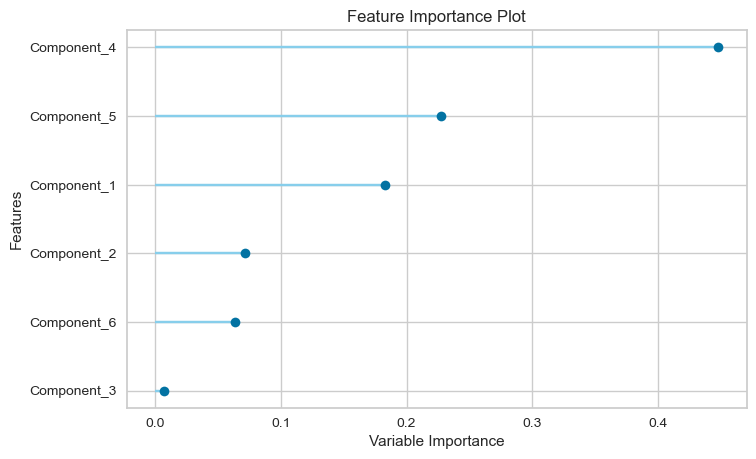

In [28]:
plot_model(gbr, plot='feature')

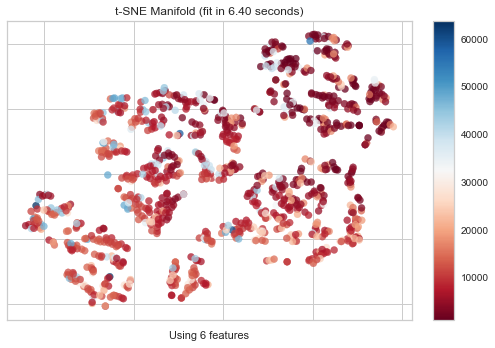

In [29]:
plot_model(gbr, plot='manifold')

In [30]:
#! pip install shap

In [34]:
interpret_model(gbr, plot='correlation', feature='Component_5')

TypeError: This function only supports tree based models for binary classification: rf, xgboost, dt, lightgbm, catboost, et.

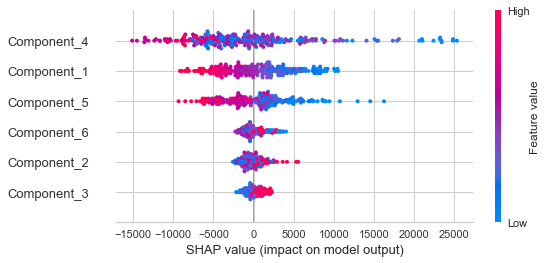

In [35]:
interpret_model(lgbm)